In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.special import hyp2f1, hyperu, gamma
from scipy import optimize
from scipy.stats import norm, halfnorm
import scipy.optimize

from astropy.cosmology import Planck18 as cosmo
from astropy.constants import G, c, m_p

from matplotlib.patches import Ellipse
from matplotlib.patches import Arc

import sys 
from importlib import reload  

In [2]:
sys.path.append('../AppStat/AppStatSophia') 
import SophiasExternalFunctions as sw

sys.path.append('../') 
import BachelorProjectExternalFunctions as bp

In [3]:
sys.path.append('../') 
import FRB_external_functions as frb

In [4]:
# FOR ALL PLOTS EXCEPT THE COLORMAP PLOT
import seaborn as sns
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [5]:
save_plots = False

### Data

In [6]:
data = np.genfromtxt('FRBcatalog.dat', skip_header=1)
name, z, DM_total, DM_total_err, DM_MW_ISM = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]
tau_obs, tau_err, freq =  data[:,5], data[:,6], data[:,7]

### $\tau$ - DM$_{Host}$ relation

**FRBs where tau IS NOT measured** <br>
$DM_{host} = \frac{100}{1+z}$

In [7]:
DM_host_missing_tau = np.zeros_like(name)

N = 0

for i in range(len(tau_obs)):
    if tau_obs[i]==0:
        DM_host_missing_tau[i]+=100/(1+z[i])  
        N+=1

**FRBs where tau IS measured** 

Consistent freuqency for tau (1 GHz)

$\frac{\tau_1}{\tau_2} = \left( \frac{\nu_1}{\nu_2} \right)^a$ 

where a is the scattering index (assumed to be = -4) og $\nu$ og $\tau$ are the observed frequencies/1GHz and the scattering timescales, respectivly. 


$\frac{\tau_{obs}}{\tau_{1GHz}} = \left( \frac{\nu_{obs}}{1 GHz} \right)^{-4} \Rightarrow \tau_{1GHz} = \tau_{obs} \left( \frac{\nu_{obs}}{1 GHz} \right)^{4}$

In [8]:
tau = tau_obs*freq**4

**Convert $\tau$ to DM$_{Host}$**

By using the relation $\tau(DM)$ and WolframAlpha

$\tau(DM) = 2.98 \cdot 10^{-7} ms \cdot DM^{1.4} \cdot (1+3.55 \cdot 10^{-5} \cdot DM^{3.1}) $

In [9]:
DM_host_from_tau = np.array([119.697, 0, 73.0755, 312.443, 0, 116.172, 167.272, 634.14, 296.092, 443.864, 232.499, 
                    0, 0, 301.613, 0, 125.642, 0, 0, 0, 0, 0])

DM_host = DM_host_from_tau + DM_host_missing_tau

#### tau(DM)

In [10]:
DM = np.arange(1,0.5*1e4)
tau_scale = frb.tau_DM(DM)

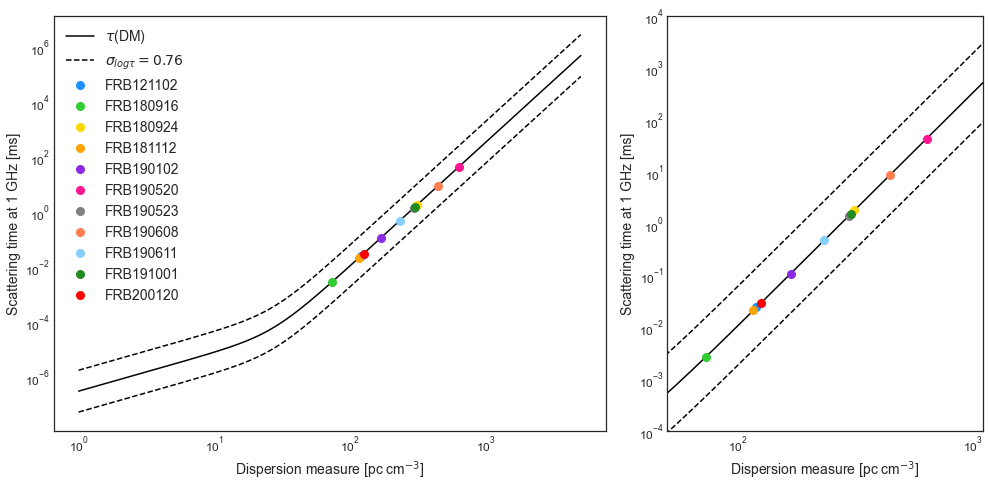

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,7), gridspec_kw={'width_ratios': [7, 4]})


color = ['dodgerblue', 0, 'limegreen', 'gold', 0, 'orange', 'blueviolet', 'deeppink', 'grey', 'coral', 'lightskyblue',0, 0, 'forestgreen',0, 'red']

ax1.plot(DM, tau_scale, color='black', label='$\\tau$(DM)')
ax1.plot(DM, tau_scale*10**0.76, color='black', ls='dashed', label='$\sigma_{log \\tau} = 0.76$')
ax1.plot(DM, tau_scale*10**-0.76, color='black', ls='dashed')
ax2.plot(DM, tau_scale, color='black', label='$\\tau$(DM)')
ax2.plot(DM, tau_scale*10**0.76, color='black', ls='dashed', label='$\sigma_{log \\tau} = 0.76$')
ax2.plot(DM, tau_scale*10**-0.76, color='black', ls='dashed')

for i in range(len(DM_host_from_tau)):
    if DM_host_from_tau[i]>1:
        ax1.plot(DM_host_from_tau[i], tau[i],'o', ms=8, color=color[i], label=f'FRB{round(name[i])}')
        ax2.plot(DM_host_from_tau[i], tau[i],'o', ms=8, color=color[i], label=f'FRB{round(name[i])}')
        
ax1.set_ylabel('Scattering time at 1 GHz [ms]', fontsize=14)
ax1.set_xlabel('Dispersion measure [pc cm$^{-3}$]', fontsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=14)

ax2.set_ylabel('Scattering time at 1 GHz [ms]', fontsize=14)
ax2.set_xlabel('Dispersion measure [pc cm$^{-3}$]', fontsize=14)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(50,1100)
ax2.set_ylim(1e-4, 1e4)


fig.tight_layout()

if save_plots:
        fig.savefig('TauDM.pdf', dpi=300);

**LaTeX table with $\tau$ and $DM_{Host}$**

In [12]:
print("\\begin{tabular}{cc}")
print("\t \\hline")
print("\t \\hline")
print("\t {0:15s} & {1:7s}\\\\".format( "tau", "DM_{Host}"))
print("\t \\hline")

for n, t, DM  in zip(name, tau, DM_host_from_tau):
    print(f"\t FRB{n:2.0f}  & \t {t:10.3} & \t {DM:2.0f} \\\\")
    
print("\t \\hline")
print("\\end{tabular}")
print("")

\begin{tabular}{cc}
	 \hline
	 \hline
	 tau             & DM_{Host}\\
	 \hline
	 FRB121102  & 	      0.024 & 	 120 \\
	 FRB180301  & 	        0.0 & 	  0 \\
	 FRB180916  & 	     0.0027 & 	 73 \\
	 FRB180924  & 	       1.78 & 	 312 \\
	 FRB181030  & 	        0.0 & 	  0 \\
	 FRB181112  & 	      0.021 & 	 116 \\
	 FRB190102  & 	      0.108 & 	 167 \\
	 FRB190520  & 	       43.1 & 	 634 \\
	 FRB190523  & 	        1.4 & 	 296 \\
	 FRB190608  & 	       8.65 & 	 444 \\
	 FRB190611  & 	      0.472 & 	 232 \\
	 FRB190711  & 	        0.0 & 	  0 \\
	 FRB190714  & 	        0.0 & 	  0 \\
	 FRB191001  & 	       1.52 & 	 302 \\
	 FRB191228  & 	        0.0 & 	  0 \\
	 FRB200120  & 	     0.0298 & 	 126 \\
	 FRB200430  & 	        0.0 & 	  0 \\
	 FRB200906  & 	        0.0 & 	  0 \\
	 FRB201124  & 	        0.0 & 	  0 \\
	 FRB210320  & 	        0.0 & 	  0 \\
	 FRB211127  & 	        0.0 & 	  0 \\
	 \hline
\end{tabular}



### DM_cosmic as a function of redshift

**Determining DM contributions**

In [13]:
# DM contributions
DM_MW_halo = np.ones_like(name)*50 #30-50
DM_host = np.ones_like(name)*100
DM_host[name==190520.0] = 1121
DM_cosmic = DM_total - DM_MW_ISM - DM_MW_halo - DM_host/(1+z)

# Uncertainties
DM_MW_err, DM_host_err = 30, 50
DM_cosmic_err = np.sqrt(DM_total_err**2 + DM_MW_err**2 + DM_host_err**2/(1+z)**2)

In [14]:
# Deleting two data points (negative DMcosmic)
name_final = np.delete(name, [4,15])
DM_cosmic_final = np.delete(DM_cosmic, [4,15])
DM_cosmic_err_final = np.delete(DM_cosmic_err, [4,15])
z_final = np.delete(z, [4,15])

**Creating 2D pdfs for colormap**

In [15]:
z_array = np.linspace(0.001,0.7,700)
DM_array = np.linspace(1,1200,1200)

DM_prob = []

for i in range(len(z_array)):
    DM_prob.append(frb.pdf_DM_z(z_array[i], DM_array)[0])

DM_prob = np.array(DM_prob)

for i in range(len(DM_prob)):
    for j in range(len(DM_prob[0])): 
        if DM_prob[i][j] <= 0.01:
            DM_prob[i][j]+=0.01
        if DM_prob[i][j] >= 1:
            DM_prob[i][j]*= 1/DM_prob[i][j]

### Fit $\Omega_bH_0$

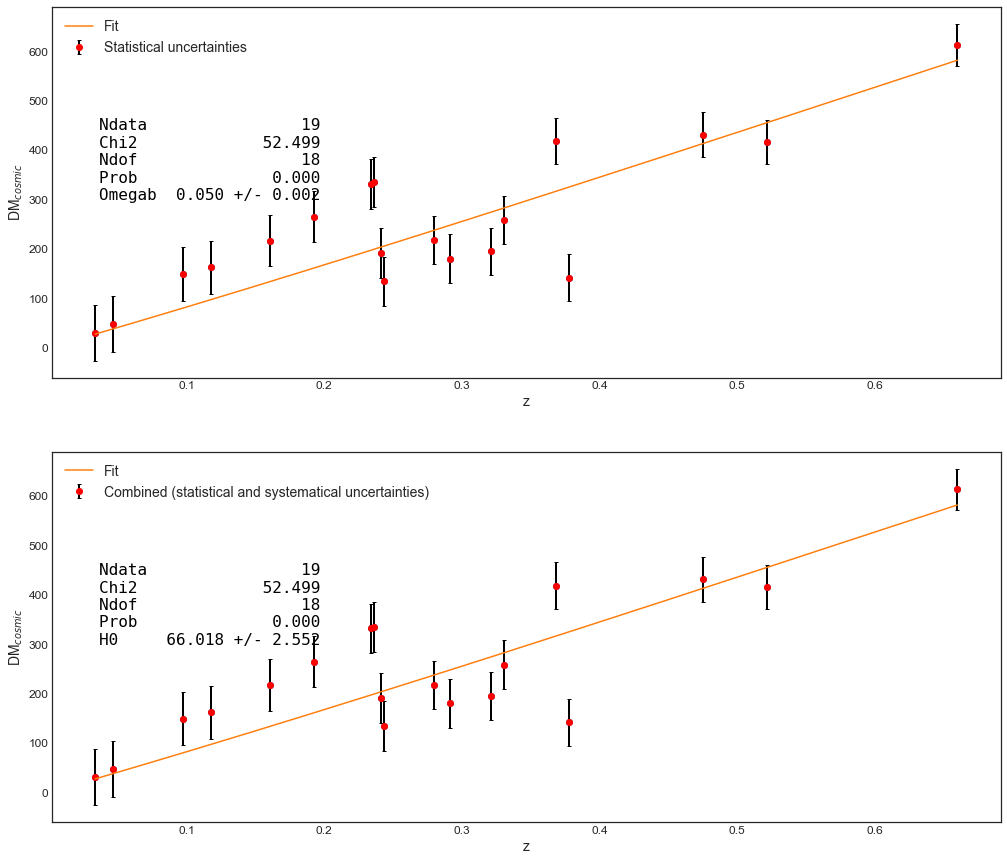

In [16]:
startguess = cosmo.Ob0

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(17,15))
_, _, _, par_Omegab, par_err_Omegab = frb.chisquarefit(z_final, DM_cosmic_final, DM_cosmic_err_final, frb.fit_Omegab, [startguess], ax1, 
                          plot=True, xlabel='z', ylabel='DM$_{cosmic}$', funclabel='Fit', 
                          label='Statistical uncertainties', d_xy=[0.05, 0.70])

startguess = cosmo.H0.value


_, _, _, par_H0, par_err_H0 = frb.chisquarefit(z_final, DM_cosmic_final, DM_cosmic_err_final, frb.fit_H0, [startguess], ax2, 
                          plot=True, xlabel='z', ylabel='DM$_{cosmic}$', funclabel= 'Fit', 
                          label='Combined (statistical and systematical uncertainties)', d_xy=[0.05, 0.70])

### Result

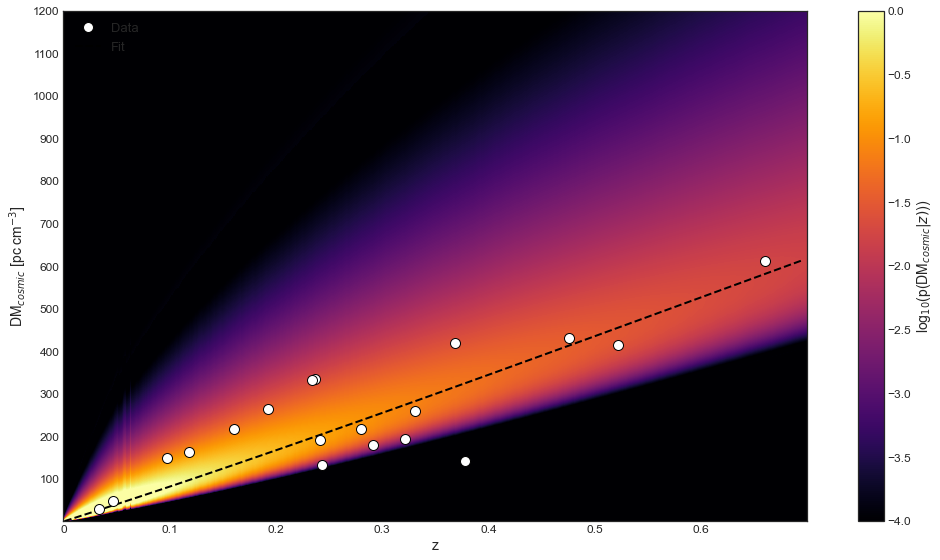

In [17]:
fig = plt.figure(figsize=(15,8))
image = rotate(np.log(DM_prob), 90)
plt.imshow(image, vmin=-4, vmax=0.,   aspect=0.4, cmap='inferno') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700], ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'])
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], ['1200','1100','1000','900','800','700','600', '500', '400', '300', '200', '100', '0'])
plt.xlabel('z')
plt.ylabel('DM$_{cosmic}$ [pc cm$^{-3}$]')
cbar = plt.colorbar()
cbar.set_label('log$_{10}$(p(DM$_{cosmic}|z)$))')


x_fit = np.linspace(0.001, 0.696, 100)
y_fit = frb.fit_H0(x_fit, par_H0[0])

plt.plot(z_final*1000, -DM_cosmic_final+1200, 'o', label='Data', color='white', mec='black', ms=10, zorder=10)
plt.plot(x_fit*1000, -y_fit+1200, label='Fit', lw=2, color='black', ls='dashed')
plt.tight_layout()
plt.legend(loc='upper left', fontsize=13); 

if save_plots:
        fig.savefig('DM_z.pdf', dpi=300);

In [18]:
# Planck H0
H0_planck = 67.4
H0_err_planck = 0.5

# SHOES H0
H0_shoes = 73.04
H0_err_shoes = 1.04 

# FRB H0
ObH02 = 0.02242 *100*100
ObH02_err = 0.00014*100*100

H0_frb = par_H0[0]
H0_err_frb = par_err_H0[0]

print('H0 only statistical uncertainties',H0_frb, '+/-', H0_err_frb)

# FRB Omegab
Ob_frb = par_Omegab[0]
Ob_err_frb = par_err_Omegab[0]

print(Ob_frb, '+/-', Ob_err_frb)

H0 only statistical uncertainties 66.01821473347266 +/- 2.5519130547095745
0.05019260387608906 +/- 0.0019401801736448603


In [19]:
# z-test
nsigma_planckshoes, p_planckshoes = frb.ztest(H0_shoes,H0_planck,H0_err_shoes,H0_err_planck,2)
nsigma_planck, p_planck = frb.ztest(H0_frb,H0_planck,H0_err_frb,H0_err_planck,2)
nsigma_shoes, p_shoes = frb.ztest(H0_frb,H0_shoes,H0_err_frb,H0_err_shoes,2)
print(nsigma_planckshoes)
print(nsigma_planck)
print(nsigma_shoes)

4.887561225309663
0.5313670465904289
2.548098687805816


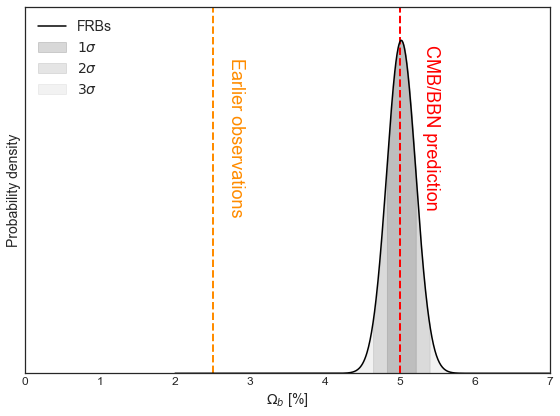

In [20]:
Ob_t = 5    # Predictions
Ob_m = 2.5  # Earlier measurements

# Probability distribution of Omegab found from FRBs
x = np.linspace(2, 7, 1000)
y = norm.pdf(x, Ob_frb*100, Ob_err_frb*100)
y *= 1/y.max()

fig, ax = plt.subplots(figsize=(8,6))
ax.vlines(Ob_t, 0, 1.1, lw=2, ls='dashed', color='red')
ax.vlines(Ob_m, 0, 1.1, lw=2, ls='dashed', color='darkorange')
ax.fill_between(x[565:643], y[565:643], color='grey', alpha=0.3, label='$1\sigma$')
ax.fill_between(x[528:680], y[528:680], color='grey', alpha=0.2, label='$2\sigma$')
ax.fill_between(x, y, color='grey', alpha=0.1, label='$3\sigma$')

ax.plot(x,y, color='black', label='FRBs')
ax.set_xlim(0,7)
ax.set_ylim(0,1.1)
ax.text(5.3,0.5, 'CMB/BBN prediction', rotation='-90', fontsize=18, color='red')
ax.text(2.7,0.48, 'Earlier observations', rotation='-90', fontsize=18, color='darkorange')
ax.legend(loc='upper left')
ax.set_xlabel('$\Omega_b$ [%]', fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)
ax.set_yticks([])

fig.tight_layout()

if save_plots:
        fig.savefig('Omegab.pdf', dpi=300);

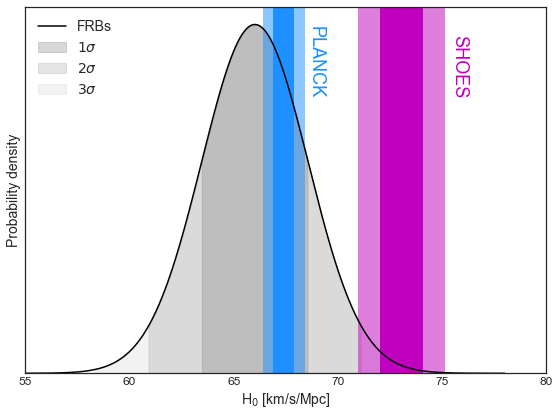

In [21]:
x = np.linspace(55, 78, 1000)
y = norm.pdf(x, H0_frb, H0_err_frb)
y *= 1/y.max()

#fig, ax = plt.subplots(figsize=(11,6))
fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(x[368:589], y[368:589], color='grey', alpha=0.3, label='$1\sigma$')
ax.fill_between(x[257:700], y[257:700], color='grey', alpha=0.2, label='$2\sigma$')
ax.fill_between(x[146:811], y[146:811], color='grey', alpha=0.1, label='$3\sigma$')
ax.plot(x,y, ls='solid', color='black', label='FRBs', zorder=2)
ax.bar(H0_planck, 1.1, H0_err_planck*4, color='dodgerblue', alpha=0.5)
ax.bar(H0_planck, 1.1, H0_err_planck*2, color='dodgerblue', zorder=1)
ax.bar(H0_shoes, 1.1, H0_err_shoes*4, color='m', alpha=0.5)
ax.bar(H0_shoes, 1.1, H0_err_shoes*2, color='m')
#ax.vlines(H0_stat-H0_err_stat, 0, 0.6, ls='--', color='black', alpha=0.5)
#ax.vlines(H0_stat+H0_err_stat, 0, 0.6, ls='--', color='black', alpha=0.5)
#ax.vlines(H0_stat-2*H0_err_stat, 0, 0.1395, ls='--', color='black', alpha=0.5)
#ax.vlines(H0_stat+2*H0_err_stat, 0, 0.1395, ls='--', color='black', alpha=0.5)
ax.set_ylim(0,1.05)
ax.set_xlim(55, 80)
ax.set_xlabel('H$_0$ [km/s/Mpc]', fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)
ax.set_yticks([])
ax.text(68.5,0.8, 'PLANCK', rotation='-90', fontsize=18, color='dodgerblue')
ax.text(75.4,0.8, 'SHOES', rotation='-90', fontsize=18, color='m')


#pdf_H0_norm = pdf_H0/pdf_H0.max()
#ax.plot(a_range_H0, pdf_H0_norm, color='black', ls='--', label='FRBs, llh-fit')
#ax.fill_between(a_range_H0[241:505], pdf_H0_norm[241:505], color='grey', alpha=0.3)
#ax.fill_between(a_range_H0[140:685], pdf_H0_norm[140:685], color='grey', alpha=0.2)
#ax.fill_between(a_range_H0[0:999], pdf_H0_norm[0:999], color='grey', alpha=0.1)
#ax.set_xlim(50,110)

ax.legend(loc='upper left', fontsize=14)
fig.tight_layout()

if save_plots:
        fig.savefig('H0.pdf', dpi=300);

### All data z - DM contribution plot

In [22]:
zz = np.arange(1,22)
z_sort = sorted(z)
z_sort_names = ['-0.0001','0.0039','0.0337','0.047','0.0979','0.1178','0.1608','0.1927','0.234','0.2365','0.241','0.2432','0.28',
                '0.2912','0.3212','0.3304', '0.3688','0.3778','0.4755','0.522','0.66']

In [23]:
DM_MW_ISM_sort = [x for _,x in sorted(zip(z,DM_MW_ISM))]
DM_cosmic_sort = [x for _,x in sorted(zip(z,DM_cosmic))]
DM_host_sort = [x for _,x in sorted(zip(z,DM_host))]
name_sort = [x for _,x in sorted(zip(z,name))]

DM_MW_ISM_err_sort = [np.zeros_like(DM_MW_ISM), DM_MW_ISM_sort]
DM_host_XXX_f_err_sort = [np.zeros_like(z), DM_host_sort]
DM_cosmic_final_err_sort = [np.zeros_like(z), DM_cosmic_sort]

DM_host_c = [DM_host_XXX_f_err_sort[0][2:], DM_host_XXX_f_err_sort[1][2:]]
DM_cosmic_c = [DM_cosmic_final_err_sort[0][2:], DM_cosmic_final_err_sort[1][2:]]

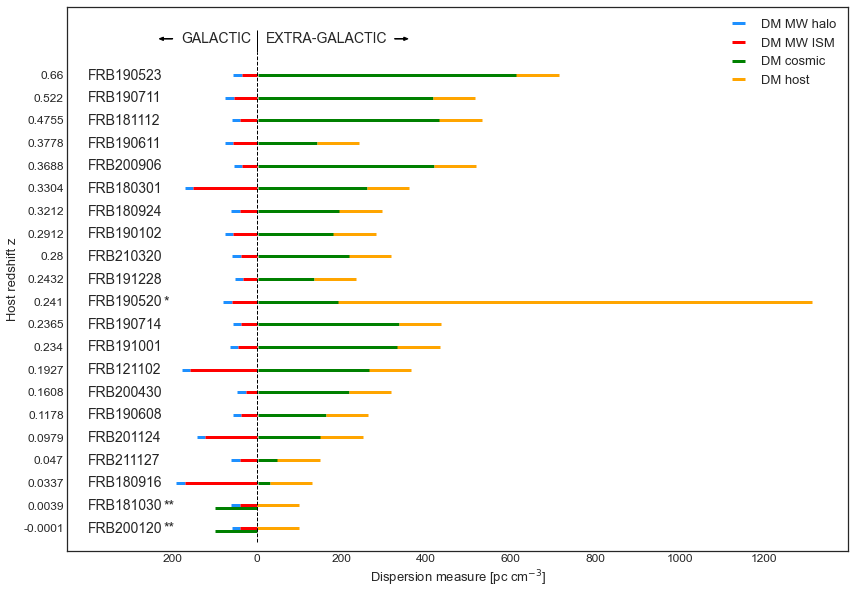

In [24]:
fig = plt.figure(figsize=(14,10))

plt.errorbar(-np.array(DM_MW_ISM_sort)-10, zz, xerr=10,  color='dodgerblue', fmt='none', capsize=0, label='DM MW halo', lw=3)
plt.errorbar(-np.array(DM_MW_ISM_sort), zz, xerr=DM_MW_ISM_err_sort, color='red', fmt='none', capsize=0, label='DM MW ISM', lw=3)
plt.errorbar(np.ones_like(z)[2:], zz[2:], xerr=DM_cosmic_c, color='green', fmt='none', capsize=0, label='DM cosmic', lw=3)
plt.errorbar(-DM_host_XXX_f_err_sort[1][0]/2, zz[0]-0.13, xerr=DM_host_XXX_f_err_sort[1][0]/2, color='green', fmt='none', capsize=0, lw=3)
plt.errorbar(-DM_host_XXX_f_err_sort[1][1]/2, zz[1]-0.11, xerr=DM_host_XXX_f_err_sort[1][1]/2, color='green', fmt='none', capsize=0, lw=3)

plt.errorbar(DM_cosmic_sort[2:], zz[2:], xerr=DM_host_c, color='orange', fmt='none', capsize=0, label='DM host', lw=3)
plt.errorbar(50, zz[0], xerr=50, color='orange', fmt='none', capsize=0, lw=3)
plt.errorbar(50, zz[1], xerr=50, color='orange', fmt='none', capsize=0, lw=3)

plt.vlines(0,0.4,22, color='black', ls='--', lw=1)
plt.ylabel('Host redshift z', fontsize=13)
plt.xlabel('Dispersion measure [pc cm$^{-3}$]', fontsize=13)
plt.xticks([-200,0,200,400,600,800,1000, 1200],[200,0,200,400,600,800,1000, 1200])
plt.yticks(zz,z_sort_names)

#plt.ylim(-0.05,0.8)
plt.vlines(0,22,23, color='black', lw=1)

plt.text(-180,22.4, 'GALACTIC')
plt.text(20,22.4, 'EXTRA-GALACTIC')
plt.arrow(-200,22.6, -22, 0, head_length=10, head_width=0.15, color='black')
plt.arrow(325,22.6, 22, 0, head_length=10, head_width=0.15, color='black')
plt.ylim(0, 24)
#plt.fill_betweenx(zz, DM_low_sigma, DM_high_sigma, alpha=0.1, color='green')
#plt.plot(y_planck, x_fit, color='black',  lw=2, label='Planck prediction')

plt.text(-222, zz[0]-0.2, '**')
plt.text(-222, zz[1]-0.2, '**')
plt.text(-222, zz[10]-0.2, '*')

for i in range(len(zz)):
    plt.text(-400, zz[i]-0.2, f'FRB{round(name_sort[i])}')

plt.legend(fontsize=13)
plt.xlim(-450, 1400)

if save_plots:
        fig.savefig('Data.pdf', dpi=300);

### MC simulation of data points

In [25]:
row_i = []
col_i = []

i = 0
j = 0
prob_all = []

while i<250:
    row_index = int(np.random.uniform(low=0, high=699)+0.5) 
    col_index = int(np.random.uniform(low=0, high=1199)+0.5)
    prob = np.random.uniform(low=0.02, high=1)
    

    if prob <= DM_prob[row_index][col_index]:
        row_i.append(row_index)
        col_i.append(col_index)
        i+=1
        
    j+=1
        
z_gen = np.array(row_i)/1000
DM_gen = -np.array(col_i)+1200
print('Efficiency:', i/j)

Efficiency: 0.06082725060827251


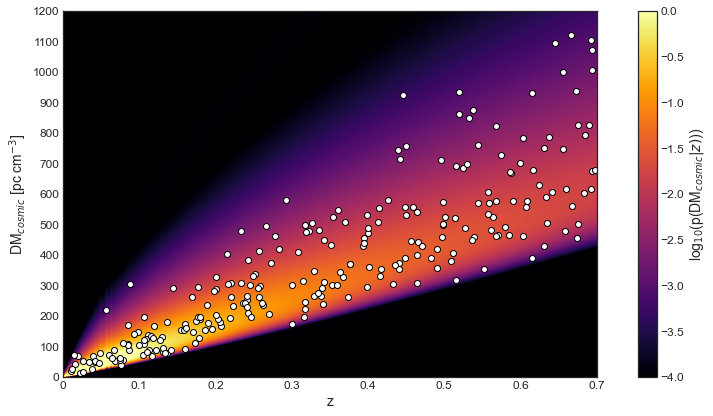

In [26]:
fig = plt.figure(figsize=(12,6))
image = rotate(np.log(DM_prob), 90)
plt.imshow(image, vmin=-4, vmax=0.,   aspect=0.4, cmap='inferno') 
plt.plot(z_gen*1000,DM_gen,'o', color='white', mec='black', label='Generated data');
#plt.plot(1000*z_gen[50:],DM_gen[50:],'o', color='red')
plt.xlim(0, 700)
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700], ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'])
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], ['1200','1100','1000','900','800','700','600', '500', '400', '300', '200', '100', '0'])
plt.xlabel('z')
plt.ylabel('DM$_{cosmic}$ [pc cm$^{-3}$]')
cbar = plt.colorbar()
cbar.set_label('log$_{10}$(p(DM$_{cosmic}|z)$))')
plt.tight_layout()
#plt.legend(loc='upper left', fontsize=13); #frameon=False, labelcolor='white'

if save_plots:
        fig.savefig('DM_z_MC2.pdf', dpi=300);

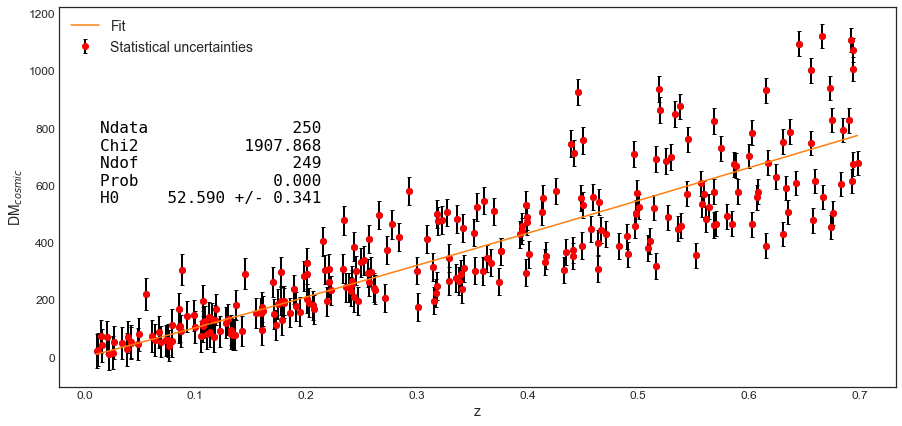

In [27]:
startguess = cosmo.H0.value*cosmo.Ob0

z_fit = np.array(row_i)/1000
DM_fit = np.array(col_i)

DM_MW_err, DM_host_err = 30, 50
DM_cosmic_err_sim = np.sqrt(DM_MW_err**2 + DM_host_err**2/(1+z_fit)**2)

fig, ax = plt.subplots(figsize=(15,7))
_, _, _, par_gen, par_err_gen = frb.chisquarefit(z_fit, DM_fit, DM_cosmic_err_sim, frb.fit_H0, [startguess], ax, 
                          plot=True, xlabel='z', ylabel='DM$_{cosmic}$', funclabel='Fit', 
                          label='Statistical uncertainties', d_xy=[0.05, 0.70])

In [28]:
def MC_sim(N):
    
    row_i = []
    col_i = []
    i = 0

    while i < N:
        
        row_index = int(np.random.uniform(low=0, high=699)+0.5) 
        col_index = int(np.random.uniform(low=0, high=1199)+0.5)
        prob = np.random.uniform(low=0.02, high=1)
    

        if prob <= DM_prob[row_index][col_index]:
            row_i.append(row_index)
            col_i.append(col_index)
            i += 1
            
    return row_i, col_i
        
    
    
    
N_array = np.linspace(50,2500,50)
N_array = np.repeat(N_array, 10)
H0_sim = []
H0_err_sim = []
nsigma_planck = []
nsigma_shoes = []



for i in N_array:
    row_i, col_i = MC_sim(i)
    

    startguess = cosmo.H0.value
    z_fit = np.array(row_i)/1000
    DM_fit = np.array(col_i)


    #fig, ax = plt.subplots(figsize=(15,7))
    _, _, _, par_sim, par_err_sim = frb.chisquarefit(z_fit, DM_fit, np.ones_like(DM_fit)*50, frb.fit_H0, [startguess], ax, plot=False)
    
    H0_sim_ = par_sim[0]
    H0_err_sim_ = par_err_sim[0]
    H0_sim.append(H0_sim_)
    H0_err_sim.append(H0_err_sim_)
    
    nsigma_planck.append(frb.ztest(H0_frb,H0_planck,H0_err_sim_,H0_err_planck,2)[0])
    nsigma_shoes.append(frb.ztest(H0_frb,H0_shoes,H0_err_sim_,H0_err_shoes,2)[0])

In [29]:
N_array_reshape = N_array.reshape((50,10))

H0_err_sim = np.array(H0_err_sim)
H0_err_sim_reshape = H0_err_sim.reshape((50,10))
H0_err_50FRBs = np.mean(H0_err_sim_reshape[0,:])
H0_err_100FRBs = np.mean(H0_err_sim_reshape[1,:])
H0_err_150FRBs = np.mean(H0_err_sim_reshape[2,:])
H0_err_250FRBs = np.mean(H0_err_sim_reshape[4,:])
H0_err_500FRBs = np.mean(H0_err_sim_reshape[9,:])
H0_err_1000FRBs = np.mean(H0_err_sim_reshape[19,:])
H0_err_2500FRBs = np.mean(H0_err_sim_reshape[49,:])

x = np.linspace(55, 78, 1000)
y = norm.pdf(x, H0_frb, H0_err_frb)
y *= 1/y.max()
y_50 =  norm.pdf(x, H0_frb, H0_err_50FRBs)
y_50 *= 1/y_50.max()
y_100 =  norm.pdf(x, H0_frb, H0_err_100FRBs)
y_100 *= 1/y_100.max()
y_250 =  norm.pdf(x, H0_frb, H0_err_250FRBs)
y_250 *= 1/y_250.max()
y_500 =  norm.pdf(x, H0_frb, H0_err_500FRBs)
y_500 *= 1/y_500.max()
y_1000 =  norm.pdf(x, H0_frb, H0_err_1000FRBs)
y_1000 *= 1/y_1000.max()
y_2500 =  norm.pdf(x, H0_frb, H0_err_2500FRBs)
y_2500 *= 1/y_2500.max()

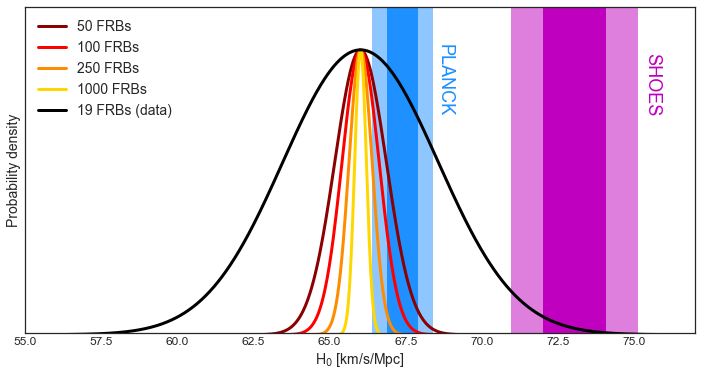

In [30]:
fig, ax0 = plt.subplots(figsize=(12, 6))

ax0.plot(x,y_50, ls='solid', color='darkred', label='50 FRBs', lw=3)
ax0.plot(x,y_100, ls='solid', color='red', label='100 FRBs', lw=3)
ax0.plot(x,y_250, ls='solid', color='darkorange', label='250 FRBs', lw=3)
ax0.plot(x,y_1000, ls='solid', color='gold', label='1000 FRBs', lw=3)
ax0.plot(x,y, ls='solid', color='black', label='19 FRBs (data)', lw=3)
ax0.bar(H0_planck, 1.15, H0_err_planck*4, color='dodgerblue', alpha=0.5)
ax0.bar(H0_planck, 1.15, H0_err_planck*2, color='dodgerblue')
ax0.bar(H0_shoes, 1.15, H0_err_shoes*4, color='m', alpha=0.5)
ax0.bar(H0_shoes, 1.15, H0_err_shoes*2, color='m')
ax0.set_ylim(0.005,1.15)
ax0.set_xlim(55,77)
ax0.set_xlabel('H$_0$ [km/s/Mpc]', fontsize=14)
ax0.set_ylabel('Probability density', fontsize=14)
ax0.set_yticks([])
ax0.text(68.5,0.78, 'PLANCK', rotation='-90', fontsize=18, color='dodgerblue')
ax0.text(75.3,.78, 'SHOES', rotation='-90', fontsize=18, color='m')
ax0.legend(loc='upper left')

if save_plots:
        fig.savefig('DM_z_MC3.pdf', dpi=300);

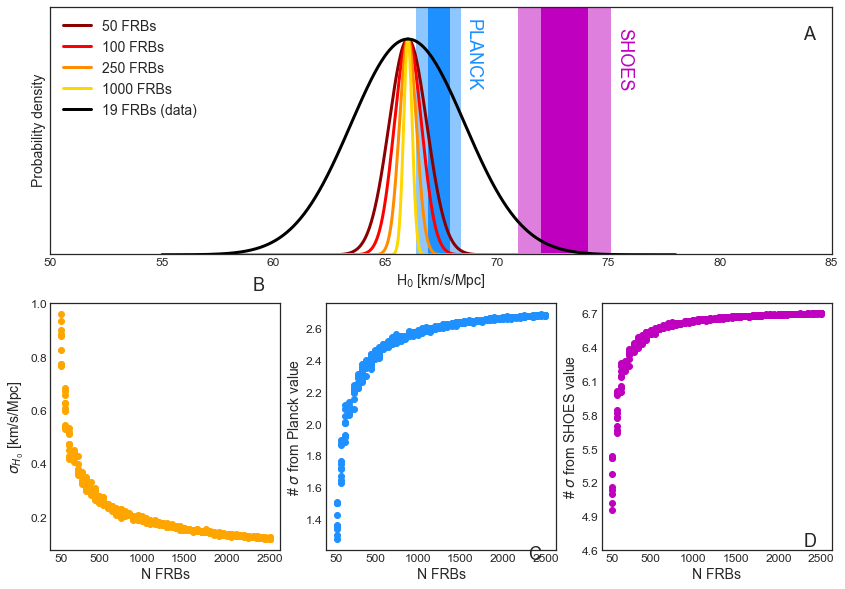

In [31]:
fig = plt.figure(figsize=(14, 10))
ax0 = plt.subplot(2,1,1)


ax0.plot(x,y_50, ls='solid', color='darkred', label='50 FRBs', lw=3)
ax0.plot(x,y_100, ls='solid', color='red', label='100 FRBs', lw=3)
ax0.plot(x,y_250, ls='solid', color='darkorange', label='250 FRBs', lw=3)
ax0.plot(x,y_1000, ls='solid', color='gold', label='1000 FRBs', lw=3)
ax0.plot(x,y, ls='solid', color='black', label='19 FRBs (data)', lw=3)
ax0.bar(H0_planck, 1.15, H0_err_planck*4, color='dodgerblue', alpha=0.5)
ax0.bar(H0_planck, 1.15, H0_err_planck*2, color='dodgerblue')
ax0.bar(H0_shoes, 1.15, H0_err_shoes*4, color='m', alpha=0.5)
ax0.bar(H0_shoes, 1.15, H0_err_shoes*2, color='m')
ax0.set_ylim(0.005,1.15)
ax0.set_xlim(50,85)
ax0.set_xlabel('H$_0$ [km/s/Mpc]', fontsize=14)
ax0.set_ylabel('Probability density', fontsize=14)
ax0.set_yticks([])
ax0.text(68.5,0.78, 'PLANCK', rotation='-90', fontsize=18, color='dodgerblue')
ax0.text(75.3,.78, 'SHOES', rotation='-90', fontsize=18, color='m')
ax0.legend(loc='upper left')

ax1 = plt.subplot(2,3,4)
ax1.plot(N_array, H0_err_sim, 'o', color='orange', zorder=1)
ax1.set_xlabel('N FRBs')
ax1.set_ylabel('$\sigma_{H_0}$ [km/s/Mpc]', fontsize=14)
#ax1.set_yscale('log')
#ax1.hlines(min(H0_err_sim)+0.008, 20, 2500, ls='--', color='black', lw=3, zorder=2)
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticks([50, 500, 1000, 1500 , 2000, 2500])
ax1.set_xticklabels([50, 500, 1000, 1500 , 2000, 2500])

ax2 = plt.subplot(2,3,5)
ax2.plot(N_array, nsigma_planck, 'o', color='dodgerblue', zorder=1)
ax2.set_xlabel('N FRBs')
ax2.set_ylabel('# $\sigma$ from Planck value')
#ax2.hlines(max(nsigma_planck)-0.013, 20, 2500, ls='--', color='black', lw=3, zorder=2)
#ax2.set_yticks([1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8])
#ax2.set_yticklabels([1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8])
ax2.set_xticks([50, 500, 1000, 1500 , 2000, 2500])
ax2.set_xticklabels([50, 500, 1000, 1500 , 2000, 2500])

ax3 = plt.subplot(2,3,6)
ax3.plot(N_array, nsigma_shoes, 'o', color='m', zorder=1)
ax3.set_xlabel('N FRBs')
ax3.set_ylabel('# $\sigma$ from SHOES value')
#ax3.hlines(max(nsigma_shoes)-0.015, 20, 2500, ls='--', color='black', lw=3, zorder=2)
ax3.set_yticks([4.6, 4.9, 5.2, 5.5 , 5.8, 6.1, 6.4, 6.7])
ax3.set_yticklabels([4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7])
ax3.set_xticks([50, 500, 1000, 1500 , 2000, 2500])
ax3.set_xticklabels([50, 500, 1000, 1500 , 2000, 2500])

ax0.text(83.7,1, 'A', fontsize=18)
ax1.text(2300,1.05, 'B', fontsize=18)
ax2.text(2300,1.15, 'C', fontsize=18)
ax3.text(2300,4.63, 'D', fontsize=18)

if save_plots:
        fig.savefig('simulation.pdf', dpi=300);

### Likelihood fit

In [32]:
def _pdf_(delta, z_final, C0):
    alpha, beta, F = 3, 3, 0.32
    DM_sigma = F*z_final**(-1/2)
    pdf = delta**-beta * np.exp(-(delta**-alpha-C0)**2/(2*alpha**2*DM_sigma**2)) 
    return -pdf
    
def get_pdf_mode(z_final, C0):
    return scipy.optimize.minimize(lambda delta: _pdf_(delta, z_final, C0), [1]).x
    
def guess_C0(z_final):
    return scipy.optimize.root(lambda C0: get_pdf_mode(z_final, C0)-1, [-5]).x

In [35]:
C0 = np.array([guess_C0(z)[0] for z in z_final])

def likelihood_H0(a):
    alpha, beta, F = 3, 3, 0.32
    DM_sigma = F*z_final **(-1/2)
    exp_DM = frb.fit_H0(z_final, a)  
    delta_DM = DM_cosmic_final/exp_DM    

    A = 1/(exp_DM*gamma(2/3)*DM_sigma**(2/3)*np.exp(-C0**2/(18*DM_sigma**2))*hyperu(1/3,1/2,C0**2/(18*DM_sigma**2))*6**(-1/3))
    
    log_pdf = np.log(A)-beta*np.log(delta_DM)-(delta_DM**-alpha-C0)**2/(2*alpha**2*DM_sigma**2)
    
    logl = -np.sum(log_pdf)
    
    return logl

#np.seterr("raise")

H0 = scipy.optimize.minimize(likelihood_H0, 3.3, bounds=[(1, np.inf)]).x[0]
#plt.semilogy(a_range, [likelihood(a) for a in a_range])
#likelihood(3.5)

In [36]:
C0 = np.array([guess_C0(z)[0] for z in z_final])

def likelihood_Omegab(a):
    alpha, beta, F = 3, 3, 0.32
    DM_sigma = F*z_final**(-1/2)
    exp_DM = frb.fit_Omegab(z_final, a)  
    delta_DM = DM_cosmic_final/exp_DM    

    A = 1/(exp_DM*gamma(2/3)*DM_sigma**(2/3)*np.exp(-C0**2/(18*DM_sigma**2))*hyperu(1/3,1/2,C0**2/(18*DM_sigma**2))*6**(-1/3))
    
    log_pdf = np.log(A)-beta*np.log(delta_DM)-(delta_DM**-alpha-C0)**2/(2*alpha**2*DM_sigma**2)
    
    logl = -np.sum(log_pdf)
    
    return logl

#np.seterr("raise")

Omegab = scipy.optimize.minimize(likelihood_Omegab, 3.3, bounds=[(0.00001, np.inf)]).x[0]

In [38]:
a_range_H0 = np.linspace(70,110, 1000)
logL_H0 = [likelihood_H0(a) for a in a_range_H0]

H0_err_minus = H0-a_range_H0[241]
H0_err_plus = -H0+a_range_H0[505]
print('H0 = ', H0, '+', H0_err_plus, '-', H0_err_minus)

a_range_Omegab = np.linspace(0.0255,0.05, 1000)
logL_Omegab = [likelihood_Omegab(a) for a in a_range_Omegab]

Omegab_err_minus = (Omegab-a_range_Omegab[365])
Omegab_err_plus = (-Omegab+a_range_Omegab[760])
print('Omegab = ', Omegab*100, '+', Omegab_err_plus*100, '-', Omegab_err_minus*100)

H0 =  83.33414828227572 + 6.886071937944507 - 3.684498632626074
Omegab =  3.9763244653191423 + 0.43753939854472224 - 0.5311793201739967


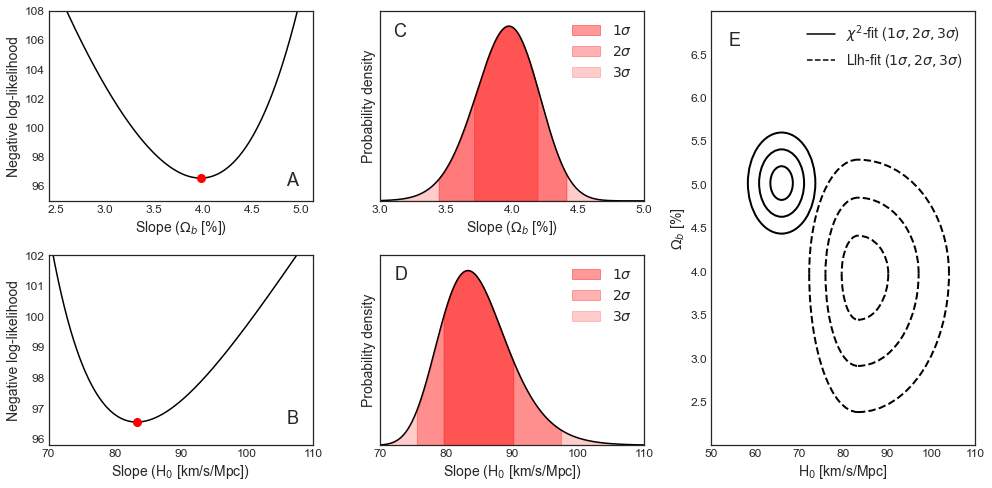

In [39]:
fig = plt.figure(figsize=(14, 7))

# minimum Omegab
ax1 = plt.subplot(2,3,1)
ax1.plot(a_range_Omegab, logL_Omegab, color='black')
ax1.set_xlabel('Slope ($\Omega_b$ [%])', fontsize=14)
ax1.set_ylabel('Negative log-likelihood', fontsize=14)
ax1.plot(Omegab, min(logL_Omegab), 'o', color='red', ms=8, label='Minimum')
ax1.set_ylim(95, 108)
ax1.set_xticks([0.025, 0.03, 0.035, 0.04 , 0.045, 0.05])
ax1.set_xticklabels(['2.5', '3.0', '3.5', '4.0', '4.5', '5.0'])



# distribution Omegab
ax2 = plt.subplot(2,3,2)
pdf_Omegab = np.exp(-np.array([likelihood_Omegab(a) for a in a_range_Omegab]))
ax2.plot(a_range_Omegab, pdf_Omegab, color='black')
ax2.set_xlabel('Slope ($\Omega_b$ [%])', fontsize=14)
ax2.set_ylabel('Probability density', fontsize=14)
ax2.set_yticks([])
ax2.fill_between(a_range_Omegab[365:760], pdf_Omegab[365:760], color='red', alpha=0.4, label='$1\sigma$')
ax2.fill_between(a_range_Omegab[474:671], pdf_Omegab[474:671], color='red', alpha=0.3, label='$2\sigma$')
ax2.fill_between(a_range_Omegab[0:999], pdf_Omegab[0:999], color='red', alpha=0.2, label='$3\sigma$')
ax2.legend()
ax2.set_ylim(0, 1.2609084327154064e-42)
ax2.set_xlim(min(a_range_Omegab), max(a_range_Omegab)-0.001)
ax2.set_xlim(0.03, 0.05)
ax2.set_xticks([0.03, 0.035, 0.04 , 0.045, 0.05])
ax2.set_xticklabels(['3.0', '3.5', '4.0', '4.5', '5.0'])

# minimum H0
ax3 = plt.subplot(2,3,4)
ax3.plot(a_range_H0, logL_H0, color='black')
ax3.set_xlabel('Slope (H$_0$ [km/s/Mpc])', fontsize=14)
ax3.set_ylabel('Negative log-likelihood', fontsize=14)
ax3.plot(H0, min(logL_H0), 'o', color='red', ms=8, label='Minimum')
ax3.set_ylim(95.8, 102)
ax3.set_xlim(70, 110)


# distribution H0
ax4 = plt.subplot(2,3,5)
pdf_H0 = np.exp(-np.array([likelihood_H0(a) for a in a_range_H0]))
ax4.plot(a_range_H0, pdf_H0, color='black')
ax4.set_xlabel('Slope (H$_0$ [km/s/Mpc])', fontsize=14)
ax4.set_ylabel('Probability density', fontsize=14)
ax4.set_yticks([])
ax4.fill_between(a_range_H0[241:505], pdf_H0[241:505], color='red', alpha=0.4, label='$1\sigma$')
ax4.fill_between(a_range_H0[140:685], pdf_H0[140:685], color='red', alpha=0.3, label='$2\sigma$')
ax4.fill_between(a_range_H0[0:999], pdf_H0[0:999], color='red', alpha=0.2, label='$3\sigma$')
ax4.legend()
ax4.set_ylim(0, 1.2609084327154064e-42)
ax4.set_xlim(min(a_range_H0), max(a_range_H0))



# comparison 
ax5 = plt.subplot(1,3,3)
e_stat1 = Ellipse(xy=[H0_frb, Ob_frb], width=2*H0_err_frb, height=2*Ob_err_frb, color='none', ec='black', ls='solid', lw=2)
e_stat2 = Ellipse(xy=[H0_frb, Ob_frb], width=4*H0_err_frb, height=4*Ob_err_frb, color='none', ec='black', ls='solid', lw=2)
e_stat3 = Ellipse(xy=[H0_frb, Ob_frb], width=6*H0_err_frb, height=6*Ob_err_frb, color='none', ec='black', ls='solid', lw=2)

e_H01 = Arc(xy=[H0, Omegab], width=2*H0_err_plus, height=2*Omegab_err_plus, ec='black', ls='dashed', lw=2, theta1=0, theta2=90)
e_H02 = Arc(xy=[H0, Omegab], width=2*H0_err_minus, height=2*Omegab_err_plus, ec='black', ls='dashed', lw=2, theta1=90, theta2=180)
e_H03 = Arc(xy=[H0, Omegab], width=2*H0_err_minus, height=2*Omegab_err_minus, ec='black', ls='dashed', lw=2, theta1=180, theta2=270)
e_H04 = Arc(xy=[H0, Omegab], width=2*H0_err_plus, height=2*Omegab_err_minus, ec='black', ls='dashed', lw=2, theta1=270, theta2=360)

e_H011 = Arc(xy=[H0, Omegab], width=4*H0_err_plus, height=4*Omegab_err_plus, ec='black', ls='dashed', lw=2, theta1=0, theta2=90)
e_H022 = Arc(xy=[H0, Omegab], width=4*H0_err_minus, height=4*Omegab_err_plus, ec='black', ls='dashed', lw=2, theta1=90, theta2=180)
e_H033 = Arc(xy=[H0, Omegab], width=4*H0_err_minus, height=4*Omegab_err_minus, ec='black', ls='dashed', lw=2, theta1=180, theta2=270)
e_H044 = Arc(xy=[H0, Omegab], width=4*H0_err_plus, height=4*Omegab_err_minus, ec='black', ls='dashed', lw=2, theta1=270, theta2=360)

e_H0111 = Arc(xy=[H0, Omegab], width=6*H0_err_plus, height=6*Omegab_err_plus, ec='black', ls='dashed', lw=2, theta1=0, theta2=90)
e_H0222 = Arc(xy=[H0, Omegab], width=6*H0_err_minus, height=6*Omegab_err_plus, ec='black', ls='dashed', lw=2, theta1=90, theta2=180)
e_H0333 = Arc(xy=[H0, Omegab], width=6*H0_err_minus, height=6*Omegab_err_minus, ec='black', ls='dashed', lw=2, theta1=180, theta2=270)
e_H0444 = Arc(xy=[H0, Omegab], width=6*H0_err_plus, height=6*Omegab_err_minus, ec='black', ls='dashed', lw=2,theta1=270, theta2=360)

ax5.plot([1,2], [1,2], color='black', ls='solid', label='$\chi^2$-fit ($1\sigma, 2\sigma, 3\sigma$)')
ax5.plot([1,2], [1,2], color='black', ls='dashed', label='Llh-fit ($1\sigma, 2\sigma, 3\sigma$)')
ax5.add_patch(e_stat1)
ax5.add_patch(e_stat2)
ax5.add_patch(e_stat3)
ax5.add_patch(e_H01)
ax5.add_patch(e_H02)
ax5.add_patch(e_H03)
ax5.add_patch(e_H04)
ax5.add_patch(e_H011)
ax5.add_patch(e_H022)
ax5.add_patch(e_H033)
ax5.add_patch(e_H044)
ax5.add_patch(e_H0111)
ax5.add_patch(e_H0222)
ax5.add_patch(e_H0333)
ax5.add_patch(e_H0444)
#ax5.add_patch(e_r2)
#ax5.add_patch(e_r3)
ax5.set_ylim(0.02, 0.07)
ax5.set_xlim(50, 110)
ax5.legend(loc='upper right', fontsize=14)
ax5.set_xlabel('H$_0$ [km/s/Mpc]', fontsize=14)
ax5.set_ylabel('$\Omega_b$ [%]', fontsize=14)
#ax5.yaxis.tick_right()
#ax5.yaxis.set_label_position("right")
ax5.set_yticks([0.025, 0.03, 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06, 0.065])
ax5.set_yticklabels(['2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5'])
ax5.text(54,0.066, 'E', fontsize=18)
ax4.text(72.3,1.1000084327154064e-42, 'D', fontsize=18)
ax3.text(106,96.5, 'B', fontsize=18)
ax2.text(0.031,1.0909084327154064e-42, 'C', fontsize=18)
ax1.text(0.0485,96, 'A', fontsize=18)

fig.tight_layout();

if save_plots:
        fig.savefig('Llhfit2.pdf', dpi=300);
